In [7]:
import dask
from dask.distributed import Client
import dask.array as da
import xarray as xr
import numpy as np
from dask.threaded import get
from dask.highlevelgraph import HighLevelGraph
from dask.optimization import fuse

In [14]:
a = da.arange(10000000, chunks=(10000,))
a

dask.array<arange, shape=(10000000,), dtype=int64, chunksize=(10000,), chunktype=numpy.ndarray>

In [5]:
result = a.sum()
result

dask.array<sum-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>

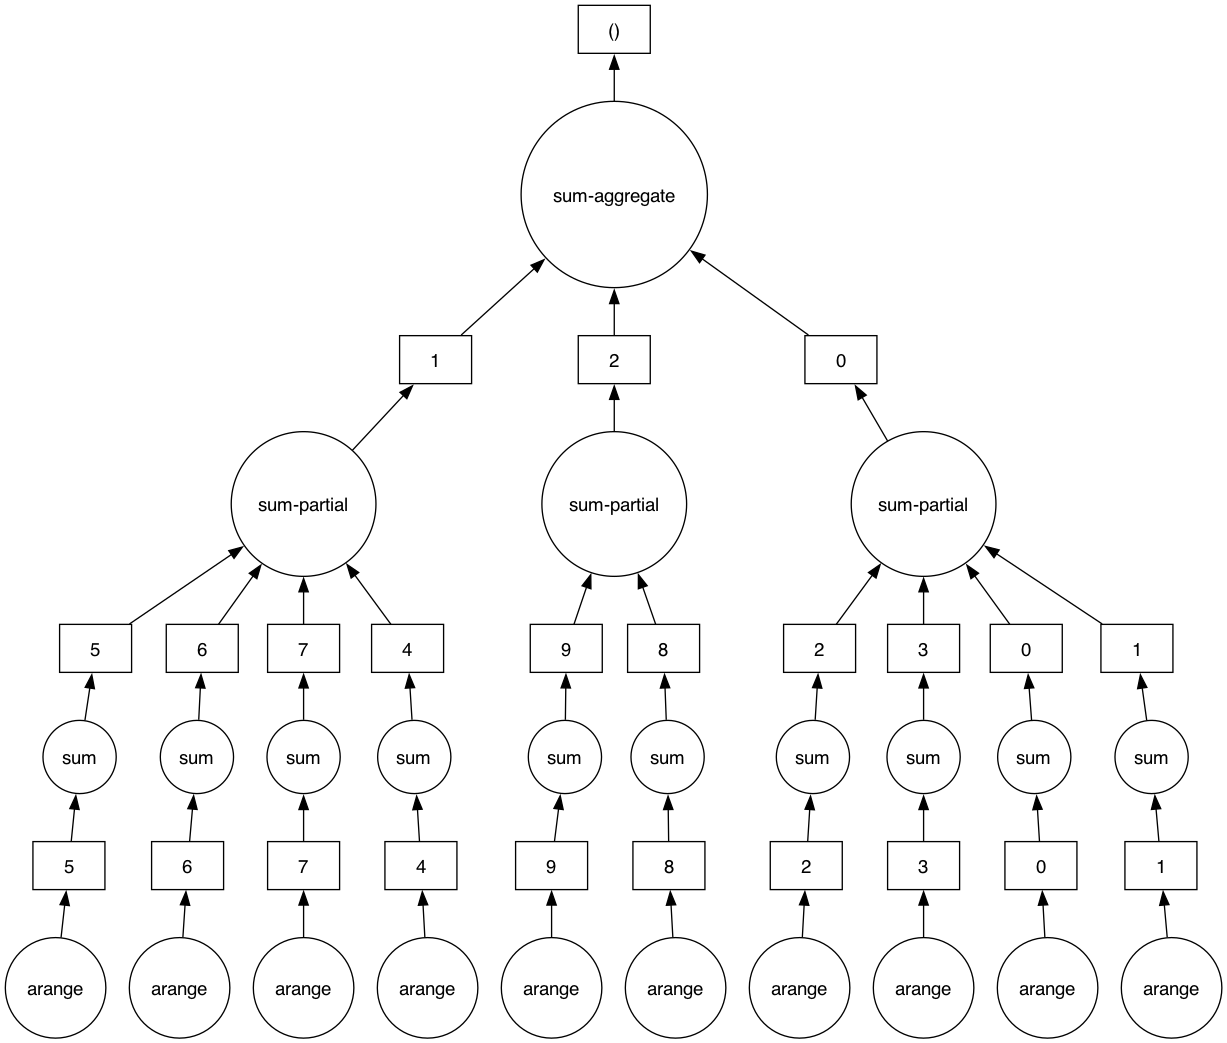

In [13]:
dask.visualize(result)

In [6]:
graph = dict(result.dask)

In [7]:
get(graph,('sum-aggregate-f91c8759583b5752b759c7202b1c1544',))

KeyError: ('sum-aggregate-f91c8759583b5752b759c7202b1c1544',)

In [34]:
from dask.optimization import fuse

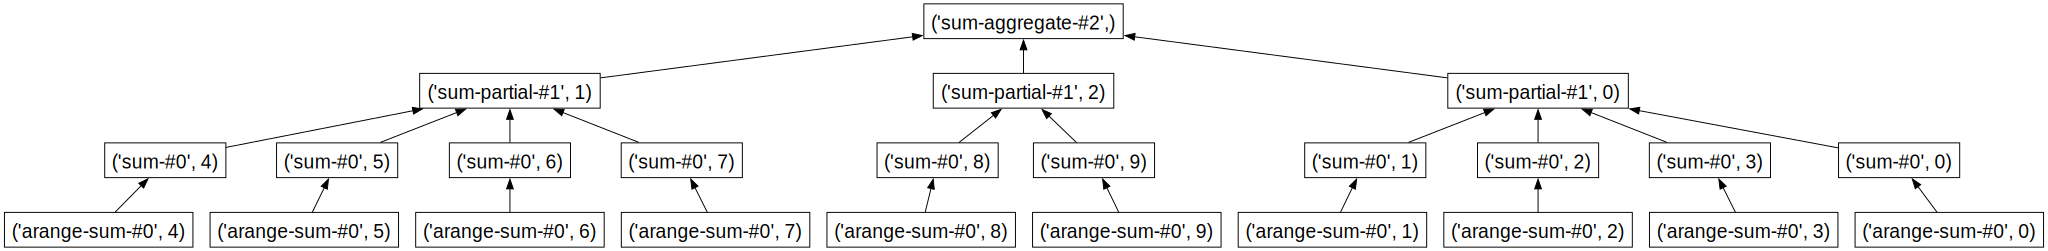

In [37]:
dsk, dep = fuse(graph)
HighLevelGraph(dsk, dep).visualize()

In [15]:
@dask.delayed
def add_unit(a):
    return a + 1


def sub_2(a):
    return a - 1

def mul_2(a):
    return a * 2

def sq_2(a):
    return a ** 2

result = add_unit(np.arange(10000000)) + sub_2(a) + mul_2(sq_2(a))
# result.visualize()

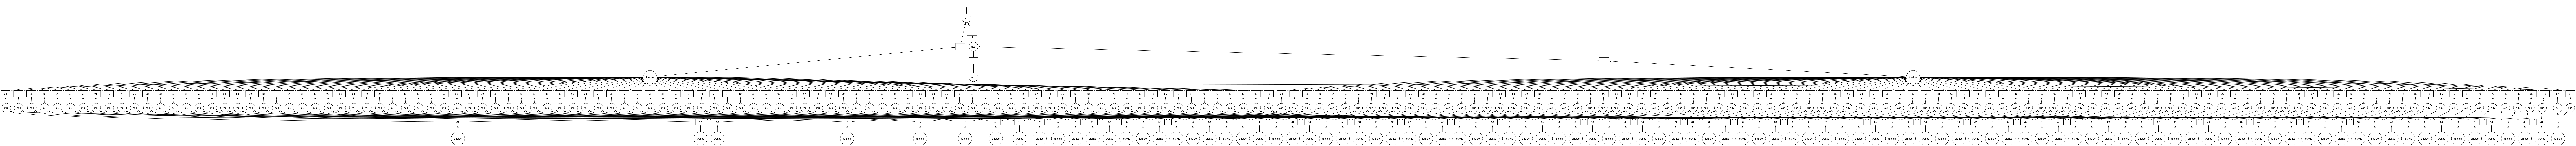

In [126]:
dask.visualize(result, optimize_graph=True)

In [29]:
result.dask.merge(result.dask)

HighLevelGraph with 9 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x159204b50>
 0. arange-f3e29e89bdefcec09c94416d7cc877d4
 1. pow-c8de4c922347f0a9f74eb6ba60c96f67
 2. mul-70cb8ee7f6799eb0f209bd6e00ebc68d
 3. finalize-84989d70-ccd9-4027-a139-f55697ae0c7b
 4. sub-6cee8e7d70db7adda2bce5bc26a8713f
 5. finalize-253e7a3b-93d7-4f21-9935-024669196fec
 6. add_unit-e1c78a5a-9bf8-4ba6-96a5-f7434cd21288
 7. add-61bd32823b46ab2e579f597bdfcd0c8c
 8. add-0bd3775a8fff364fe2ccb896ef6147d9

In [77]:
from dask.optimization import fuse
def op(dsk, key):
    # print(dsk)
    # print(key)
    

    return fuse(dsk.to_dict())[0]



%time result.compute(optimizations=[op])


CPU times: user 96.4 ms, sys: 215 ms, total: 312 ms
Wall time: 1.26 s


array([              0,               4,              12, ...,
       199999900000012, 199999940000004, 199999980000000])

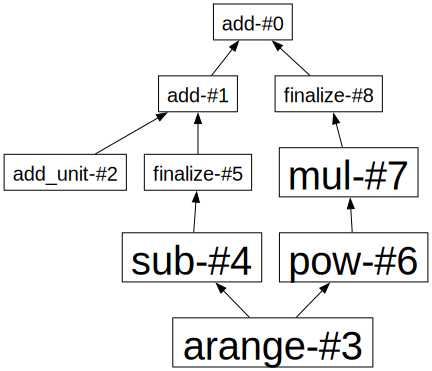

In [74]:
result.dask.visualize()

In [16]:
dsk, dep = fuse(result.dask.to_dict())
# HighLevelGraph(dsk, dep).visualize()
from dask.delayed import Delayed
result._key
Delayed(result._key, dsk).compute()

/Users/nitinsharma/miniconda3/envs/spec_line_sandbox/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 76.47 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


array([              0,               4,              12, ...,
       199999900000012, 199999940000004, 199999980000000])

In [ ]:
print('hi')

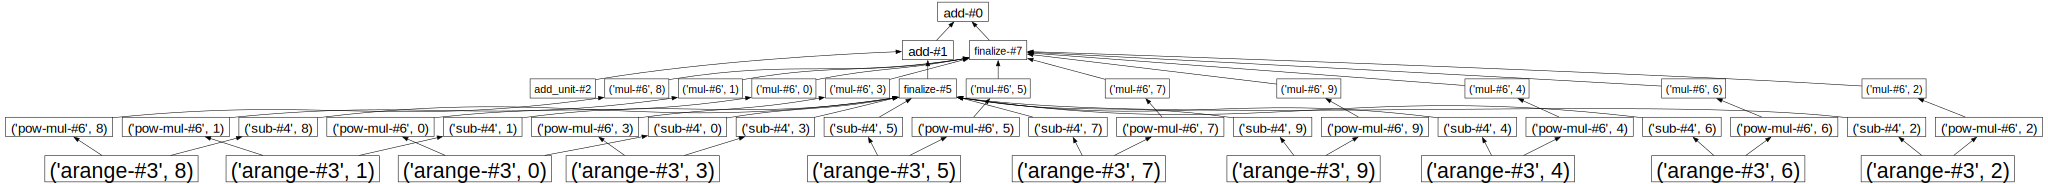

In [38]:
dsk, dep = fuse(result.dask.to_dict())
HighLevelGraph(dsk, dep).visualize()

In [65]:
result.dask.merge(result.dask.layers).__dict__
HighLevelGraph({'test': result.dask.layers}, {'test': set()})

HighLevelGraph with 1 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x159720eb0>
 0. test

In [10]:
client = Client("tcp://192.168.0.107:8786")
client

<Client: 'tcp://192.168.0.107:8786' processes=2 threads=2, memory=8.00 GiB>

2024-11-28 17:46:13,681 - distributed.client - ERROR - 
ConnectionRefusedError: [Errno 61] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/nitinsharma/miniconda3/envs/spec_line_sandbox/lib/python3.10/site-packages/distributed/comm/core.py", line 342, in connect
    comm = await wait_for(
  File "/Users/nitinsharma/miniconda3/envs/spec_line_sandbox/lib/python3.10/site-packages/distributed/utils.py", line 1957, in wait_for
    return await asyncio.wait_for(fut, timeout)
  File "/Users/nitinsharma/miniconda3/envs/spec_line_sandbox/lib/python3.10/asyncio/tasks.py", line 445, in wait_for
    return fut.result()
  File "/Users/nitinsharma/miniconda3/envs/spec_line_sandbox/lib/python3.10/site-packages/distributed/comm/tcp.py", line 559, in connect
    convert_stream_closed_error(self, e)
  File "/Users/nitinsharma/miniconda3/envs/spec_line_sandbox/lib/python3.10/site-packages/distributed/comm/tcp.py", 

In [3]:
client.get()

<bound method Client.get of <Client: 'tcp://192.168.0.107:8786' processes=1 threads=1, memory=4.00 GiB>>

In [161]:
from dask.distributed import performance_report

with performance_report(filename="report.html"):
    dask.compute(result)